In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [13]:
df = pd.read_csv("FRAFirm.csv")
#df.info()   No need to print data if we know it works
df.drop_duplicates(inplace = True)  #Cull duplicates, inplace = true makes it replace df instead of making copy

In [3]:
y = df.Class;   #y is the target, in this case the class of accident
X = df.iloc[:, df.columns != 'Class']
#iloc copies the tables
#: includes all columns from the table. FistCol : Last col can be a range of columns to use if you want
#Third argument tells computer which columns to keep, all cols except Class

In [12]:
y   #Display y, which is just the Class

0        0
1        0
2        0
3        0
4        0
        ..
38754    0
38755    0
38756    0
38757    0
38758    1
Name: Class, Length: 37306, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
#Create training and test sets

In [6]:
#Scale the values to avoid erros
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [15]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.52%
The accuracy for the test set is 94.36%


In [16]:
prob = model.predict_proba(X_test_scaled[:10])
np.set_printoptions(precision=4, suppress=True)
prob

array([[0.9784, 0.0153, 0.0063],
       [0.9037, 0.065 , 0.0313],
       [0.8844, 0.0897, 0.0259],
       [0.937 , 0.0461, 0.0169],
       [0.9909, 0.0053, 0.0038],
       [0.9767, 0.0162, 0.0071],
       [0.9953, 0.0023, 0.0024],
       [0.9566, 0.0268, 0.0166],
       [0.9829, 0.0106, 0.0066],
       [0.9178, 0.0606, 0.0215]])

In [27]:
y_pred = model.predict(X_test_scaled)   #Prediction of y
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
y_test

19896    0
37926    0
12985    0
1515     0
29279    0
        ..
6372     0
37005    0
19533    0
22179    2
16265    0
Name: Class, Length: 7462, dtype: int64

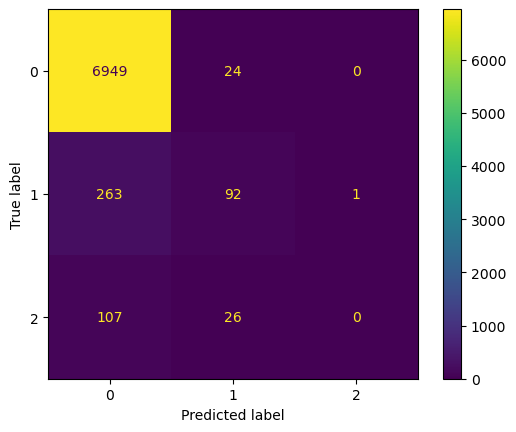

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)   #Create confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)  #Create display of confusion matrix
disp.plot() #Display confusion matrix